<a href="https://colab.research.google.com/github/Saikat4991/Enhancing-Stock-Market-Predictions-with-Sentiment-Analysis-Generative-AI-GANs-/blob/main/stock_price_nlp_gan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !python -m spacy download en_core_web_sm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # is a high-level interface for creating various types of interactive plots with minimal code.
import plotly.graph_objects as go # is a lower-level interface that offers more control and customization over the appearance and behavior of your plots

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv("/content/stock_tweets.csv")

In [ ]:
df1.head()

Date  \
0  2022-09-29 23:41:16+00:00   
1  2022-09-29 23:24:43+00:00   
2  2022-09-29 23:18:08+00:00   
3  2022-09-29 22:40:07+00:00   
4  2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.  
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.  
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.  
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.  
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.

In [ ]:
df1.tail()

Date  \
80788  2021-10-07 17:11:57+00:00   
80789  2021-10-04 17:05:59+00:00   
80790  2021-10-01 04:43:41+00:00   
80791  2021-10-01 00:03:32+00:00   
80792  2021-09-30 10:22:52+00:00   

                                                   Tweet Stock Name  \
80788  Some of the fastest growing tech stocks on the...       XPEV   
80789  With earnings on the horizon, here is a quick ...       XPEV   
80790  Our record delivery results are a testimony of...       XPEV   
80791  We delivered 10,412 Smart EVs in Sep 2021, rea...       XPEV   
80792  Why can XPeng P5 deliver outstanding performan...       XPEV   

      Company Name  
80788   XPeng Inc.  
80789   XPeng Inc.  
80790   XPeng Inc.  
80791   XPeng Inc.  
80792   XPeng Inc.

In [ ]:
df1.shape

(80793, 4)

In [ ]:
df1.columns

Index(['Date', 'Tweet', 'Stock Name', 'Company Name'], dtype='object')

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.isnull().sum()

Date            0
Tweet           0
Stock Name      0
Company Name    0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          80793 non-null  object
 1   Tweet         80793 non-null  object
 2   Stock Name    80793 non-null  object
 3   Company Name  80793 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [ ]:
df1.nunique()

Date            64424
Tweet           64479
Stock Name         25
Company Name       25
dtype: int64

In [ ]:
df1['Stock Name'].unique()

array(['TSLA', 'MSFT', 'PG', 'META', 'AMZN', 'GOOG', 'AMD', 'AAPL',
       'NFLX', 'TSM', 'KO', 'F', 'COST', 'DIS', 'VZ', 'CRM', 'INTC', 'BA',
       'BX', 'NOC', 'PYPL', 'ENPH', 'NIO', 'ZS', 'XPEV'], dtype=object)

In [ ]:
df1['Stock Name'].value_counts()

TSLA    37422
TSM     11034
AAPL     5056
PG       4089
AMZN     4089
MSFT     4089
NIO      3021
META     2751
AMD      2227
NFLX     1727
GOOG     1291
PYPL      843
DIS       635
BA        399
COST      393
INTC      315
KO        310
CRM       233
XPEV      225
ENPH      216
ZS        193
VZ        123
BX         50
NOC        31
F          31
Name: Stock Name, dtype: int64

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Stock Name', data = df1, palette = 'hls')
plt.title('Countplot of Stock Names')
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))
df1['Stock Name'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=-90, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=df1['Stock Name'].value_counts().index, y=df1['Stock Name'].value_counts())])
fig.update_layout(title='Countplot for Stock Name', xaxis_title= 'Stock Name', yaxis_title="Count")
fig.show()

In [ ]:
fig = px.pie(df1, names='Stock Name', title='Stock Name Distribution')
fig.update_layout(
    title='Stock Name Distribution',
    height=800,
    width=800
)
fig.show()

In [ ]:
df1['Company Name'].unique()

array(['Tesla, Inc.', 'Microsoft Corporation', 'Procter & Gamble Company',
       'Meta Platforms, Inc.', 'Amazon.com, Inc.', 'Alphabet Inc.',
       'Advanced Micro Devices, Inc.', 'Apple Inc.', 'Netflix, Inc.',
       'Taiwan Semiconductor Manufacturing Company Limited',
       'The Coca-Cola Company', 'Ford Motor Company',
       'Costco Wholesale Corporation', 'The Walt Disney Company',
       'Verizon Communications Inc.', 'Salesforce, Inc.',
       'Intel Corporation', 'The Boeing Company', 'Blackstone Inc.',
       'Northrop Grumman Corporation', 'PayPal Holdings, Inc.',
       'Enphase Energy, Inc.', 'NIO Inc.', 'Zscaler, Inc.', 'XPeng Inc.'],
      dtype=object)

In [ ]:
df1['Company Name'].value_counts()

Tesla, Inc.                                           37422
Taiwan Semiconductor Manufacturing Company Limited    11034
Apple Inc.                                             5056
Procter & Gamble Company                               4089
Amazon.com, Inc.                                       4089
Microsoft Corporation                                  4089
NIO Inc.                                               3021
Meta Platforms, Inc.                                   2751
Advanced Micro Devices, Inc.                           2227
Netflix, Inc.                                          1727
Alphabet Inc.                                          1291
PayPal Holdings, Inc.                                   843
The Walt Disney Company                                 635
The Boeing Company                                      399
Costco Wholesale Corporation                            393
Intel Corporation                                       315
The Coca-Cola Company                   

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Company Name', data = df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Countplot of Company Names')
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))
df1['Company Name'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=-90,
                                        colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=df1['Company Name'].value_counts().index, y=df1['Company Name'].value_counts())])
fig.update_layout(title='Countplot for Company Name', xaxis_title= 'Company Name',
                  yaxis_title="Count", height=800, width=800)
fig.show()

In [ ]:
fig = px.pie(df1, names='Company Name', title='Company Name Distribution')
fig.update_layout(
    title='Company Name Distribution',
    height=800,
    width=800
)
fig.show()

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [ ]:
df11 = df1.copy()

In [ ]:
df11

Date  \
0     2022-09-29 23:41:16+00:00   
1     2022-09-29 23:24:43+00:00   
2     2022-09-29 23:18:08+00:00   
3     2022-09-29 22:40:07+00:00   
4     2022-09-29 22:27:05+00:00   
...                         ...   
80788 2021-10-07 17:11:57+00:00   
80789 2021-10-04 17:05:59+00:00   
80790 2021-10-01 04:43:41+00:00   
80791 2021-10-01 00:03:32+00:00   
80792 2021-09-30 10:22:52+00:00   

                                                   Tweet Stock Name  \
0      Mainstream media has done an amazing job at br...       TSLA   
1      Tesla delivery estimates are at around 364k fr...       TSLA   
2      3/ Even if I include 63.0M unvested RSUs as of...       TSLA   
3      @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA   
4      @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA   
...                                                  ...        ...   
80788  Some of the fastest growing tech stocks on the...       XPEV   
80789  With earnings on the horizon, here is a quick ...       XPEV   
80790  Our record delivery results are a testimony of...       XPEV   
80791  We delivered 10,412 Smart EVs in Sep 2021, rea...       XPEV   
80792  Why can XPeng P5 deliver outstanding performan...       XPEV   

      Company Name  
0      Tesla, Inc.  
1      Tesla, Inc.  
2      Tesla, Inc.  
3      Tesla, Inc.  
4      Tesla, Inc.  
...            ...  
80788   XPeng Inc.  
80789   XPeng Inc.  
80790   XPeng Inc.  
80791   XPeng Inc.  
80792   XPeng Inc.  

[80793 rows x 4 columns]

The format you provided, "2022-09-29 23:41:16+00:00," is in ISO 8601 date and time format with a time zone offset. Here's a breakdown of its components:

"2022" is the year.
"09" is the month (September).
"29" is the day of the month.
"23" is the hour in 24-hour format (in this case, 11:00 PM).
"41" is the minute.
"16" is the second.
"+00:00" represents the time zone offset, which in this case is UTC (Coordinated Universal Time), with no offset from UTC (indicating the time is in UTC).
So, the provided timestamp represents a date and time of September 29, 2022, at 11:41:16 PM (23:41:16) in the UTC time zone.

In [ ]:
df11.set_index('Date', inplace=True)

In [ ]:
start_date = df11.index.min()
end_date = df11.index.max()

In [ ]:
print("Start Date of Stocks:", start_date)
print("End Date of Stocks:", end_date)

Start Date of Stocks: 2021-09-30 00:06:02+00:00
End Date of Stocks: 2022-09-29 23:41:16+00:00


In [ ]:
week_delta = pd.Timedelta(days=7)
current_date = start_date

In [ ]:
while current_date <= end_date:
    start_week = current_date
    end_week = current_date + week_delta
    current_week_data = df11[(df11.index >= start_week) & (df11.index < end_week)]
    weekly_counts = current_week_data.resample('D').size()
    fig = px.bar(weekly_counts, x=weekly_counts.index, y=weekly_counts.values,
                 labels={'x': 'Date', 'y': 'Number of Tweets'},
                 title=f'Tweets for Week {start_week.strftime("%Y-%m-%d")} to {end_week.strftime("%Y-%m-%d")}')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()
    current_date += week_delta

In [ ]:
daily_counts = df11.resample('D').size()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=daily_counts.index, y=daily_counts.values,
                     marker_color='skyblue'))
fig.update_layout(title='Number of Tweets Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Tweets',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = go.Figure()
for source_name, source_data in df11.groupby('Stock Name'):
    weekly_data = source_data.resample('W').size()
    fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data.values,
                            mode='lines', name=source_name))
fig.update_layout(title='Number of Tweets Week-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Tweets',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = go.Figure()
for source_name, source_data in df11.groupby('Stock Name'):
    fig.add_trace(go.Scatter(x=source_data.resample('D').size().index, y=source_data.resample('D').size().values,
                            mode='lines', name=source_name))
fig.update_layout(title='Number of Tweets Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Tweets',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = go.Figure()
for source_name, source_data in df11.groupby('Company Name'):
    weekly_data = source_data.resample('W').size()
    fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data.values,
                            mode='lines', name=source_name))
fig.update_layout(title='Number of Tweets Week-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Tweets',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = go.Figure()
for source_name, source_data in df11.groupby('Company Name'):
    fig.add_trace(go.Scatter(x=source_data.resample('D').size().index, y=source_data.resample('D').size().values,
                            mode='lines', name=source_name))
fig.update_layout(title='Number of Tweets Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Tweets',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = go.Figure()
for source_name, source_data in df11.groupby('Stock Name'):
    fig.add_trace(go.Scatter(x=source_data.resample('D').size().index, y=source_data.resample('D').size().values,
                            mode='markers', name=source_name))
fig.update_layout(title='Number of Tweets Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Tweets',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = go.Figure()
for source_name, source_data in df11.groupby('Company Name'):
    fig.add_trace(go.Scatter(x=source_data.resample('D').size().index, y=source_data.resample('D').size().values,
                            mode='markers', name=source_name))
fig.update_layout(title='Number of Tweets Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Tweets',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = go.Figure()
for source_name, source_data in df11.groupby('Stock Name'):
    fig.add_trace(go.Scatter(x=source_data.resample('D').size().index, y=source_data.resample('D').size().values,
                            mode='lines + markers', name=source_name))
fig.update_layout(title='Number of Tweets Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Tweets',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = go.Figure()
for source_name, source_data in df11.groupby('Company Name'):
    fig.add_trace(go.Scatter(x=source_data.resample('D').size().index, y=source_data.resample('D').size().values,
                            mode='lines + markers', name=source_name))
fig.update_layout(title='Number of Tweets Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Tweets',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
df11

Tweet  \
Date                                                                           
2022-09-29 23:41:16+00:00  Mainstream media has done an amazing job at br...   
2022-09-29 23:24:43+00:00  Tesla delivery estimates are at around 364k fr...   
2022-09-29 23:18:08+00:00  3/ Even if I include 63.0M unvested RSUs as of...   
2022-09-29 22:40:07+00:00  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...   
2022-09-29 22:27:05+00:00  @RealDanODowd @Tesla Stop trying to kill kids,...   
...                                                                      ...   
2021-10-07 17:11:57+00:00  Some of the fastest growing tech stocks on the...   
2021-10-04 17:05:59+00:00  With earnings on the horizon, here is a quick ...   
2021-10-01 04:43:41+00:00  Our record delivery results are a testimony of...   
2021-10-01 00:03:32+00:00  We delivered 10,412 Smart EVs in Sep 2021, rea...   
2021-09-30 10:22:52+00:00  Why can XPeng P5 deliver outstanding performan...   

                          Stock Name Company Name  
Date                                               
2022-09-29 23:41:16+00:00       TSLA  Tesla, Inc.  
2022-09-29 23:24:43+00:00       TSLA  Tesla, Inc.  
2022-09-29 23:18:08+00:00       TSLA  Tesla, Inc.  
2022-09-29 22:40:07+00:00       TSLA  Tesla, Inc.  
2022-09-29 22:27:05+00:00       TSLA  Tesla, Inc.  
...                              ...          ...  
2021-10-07 17:11:57+00:00       XPEV   XPeng Inc.  
2021-10-04 17:05:59+00:00       XPEV   XPeng Inc.  
2021-10-01 04:43:41+00:00       XPEV   XPeng Inc.  
2021-10-01 00:03:32+00:00       XPEV   XPeng Inc.  
2021-09-30 10:22:52+00:00       XPEV   XPeng Inc.  

[80793 rows x 3 columns]

In [ ]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [ ]:
df1.Tweet = df1.Tweet.apply(lambda x: clean_text(x))

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
df1.Tweet = df1.Tweet.apply(lambda x:remove_punctuation(x))

In [ ]:
import re

In [ ]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [ ]:
df1.Tweet = df1.Tweet.apply(lambda x: tokenization(x))

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def remove_stopwords(text):
    output= " ".join(i for i in text if i not in stopwords)
    return output

In [ ]:
df1.Tweet = df1.Tweet.apply(lambda x:remove_stopwords(x))

In [ ]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip()
    text = re.sub('\S*\d\S*\s*','', text).strip()
    return text.strip()

In [ ]:
df1.Tweet = df1.Tweet.apply(lambda x: clean_text(x))

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [ ]:
df1.Tweet =  df1.Tweet.apply(lambda x: lemmatizer(x))

In [ ]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [ ]:
df1.Tweet = df1.Tweet.apply(lambda x: remove_urls(x))

In [ ]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [ ]:
df1.Tweet = df1.Tweet.apply(lambda x: remove_digits(x))

In [ ]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()])
    return(clean_text)

In [ ]:
df1.Tweet = df1.Tweet.apply(lambda x: remove_digits1(x))

In [ ]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [ ]:
df1.Tweet = df1.Tweet.apply(lambda x: remove_emojis(x))

In [ ]:
df1

Date  \
0     2022-09-29 23:41:16+00:00   
1     2022-09-29 23:24:43+00:00   
2     2022-09-29 23:18:08+00:00   
3     2022-09-29 22:40:07+00:00   
4     2022-09-29 22:27:05+00:00   
...                         ...   
80788 2021-10-07 17:11:57+00:00   
80789 2021-10-04 17:05:59+00:00   
80790 2021-10-01 04:43:41+00:00   
80791 2021-10-01 00:03:32+00:00   
80792 2021-09-30 10:22:52+00:00   

                                                   Tweet Stock Name  \
0      mainstream medium amazing job brainwash people...       TSLA   
1                   tesla delivery estimate analyst tsla       TSLA   
2      include unvested rsus additional equity need r...       TSLA   
3      realdanodowd wholemarsblog tesla hahaha try st...       TSLA   
4      realdanodowd tesla stop try kill kid sad deran...       TSLA   
...                                                  ...        ...   
80788  fast grow tech stock market mix fintech adtech...       XPEV   
80789  earning horizon quick snapshot large increase ...       XPEV   
80790  record delivery result testimony unwavering pu...       XPEV   
80791  deliver smart evs sep reach milestone monthly ...       XPEV   
80792  xpeng deliver outstanding performance extreme ...       XPEV   

      Company Name  
0      Tesla, Inc.  
1      Tesla, Inc.  
2      Tesla, Inc.  
3      Tesla, Inc.  
4      Tesla, Inc.  
...            ...  
80788   XPeng Inc.  
80789   XPeng Inc.  
80790   XPeng Inc.  
80791   XPeng Inc.  
80792   XPeng Inc.  

[80793 rows x 4 columns]

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
def get_sentiment_label(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df1['sentiment'] = df1['Tweet'].apply(get_sentiment_label)

In [ ]:
df1

Date  \
0     2022-09-29 23:41:16+00:00   
1     2022-09-29 23:24:43+00:00   
2     2022-09-29 23:18:08+00:00   
3     2022-09-29 22:40:07+00:00   
4     2022-09-29 22:27:05+00:00   
...                         ...   
80788 2021-10-07 17:11:57+00:00   
80789 2021-10-04 17:05:59+00:00   
80790 2021-10-01 04:43:41+00:00   
80791 2021-10-01 00:03:32+00:00   
80792 2021-09-30 10:22:52+00:00   

                                                   Tweet Stock Name  \
0      mainstream medium amazing job brainwash people...       TSLA   
1                   tesla delivery estimate analyst tsla       TSLA   
2      include unvested rsus additional equity need r...       TSLA   
3      realdanodowd wholemarsblog tesla hahaha try st...       TSLA   
4      realdanodowd tesla stop try kill kid sad deran...       TSLA   
...                                                  ...        ...   
80788  fast grow tech stock market mix fintech adtech...       XPEV   
80789  earning horizon quick snapshot large increase ...       XPEV   
80790  record delivery result testimony unwavering pu...       XPEV   
80791  deliver smart evs sep reach milestone monthly ...       XPEV   
80792  xpeng deliver outstanding performance extreme ...       XPEV   

      Company Name sentiment  
0      Tesla, Inc.  Positive  
1      Tesla, Inc.   Neutral  
2      Tesla, Inc.  Positive  
3      Tesla, Inc.  Negative  
4      Tesla, Inc.  Negative  
...            ...       ...  
80788   XPeng Inc.   Neutral  
80789   XPeng Inc.  Positive  
80790   XPeng Inc.  Positive  
80791   XPeng Inc.  Positive  
80792   XPeng Inc.  Positive  

[80793 rows x 5 columns]

In [ ]:
# Save the DataFrame to a CSV file
df1.to_csv('stock_tweets_sentiments.csv', index=False)


In [ ]:
df1.rename(columns={'sentiment': 'Sentiment'}, inplace=True)

In [ ]:
df1['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
df1["Sentiment"].value_counts()

Positive    41101
Neutral     24060
Negative    15632
Name: Sentiment, dtype: int64

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Sentiment', data = df1, palette = 'hls')
plt.xticks(rotation = 90)
plt.title('Countplot of Sentiment')
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))
df1['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=-90,
                                        colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=df1['Sentiment'].value_counts().index, y=df1['Sentiment'].value_counts())])
fig.update_layout(title='Countplot for Sentiment', xaxis_title= 'Sentiment',
                  yaxis_title="Count", height=800, width=800)
fig.show()

In [ ]:
fig = px.pie(df1, names='Sentiment', title='Sentiment Distribution')
fig.update_layout(
    title='Sentiment Distribution',
    height=800,
    width=800
)
fig.show()

In [ ]:
import wordcloud

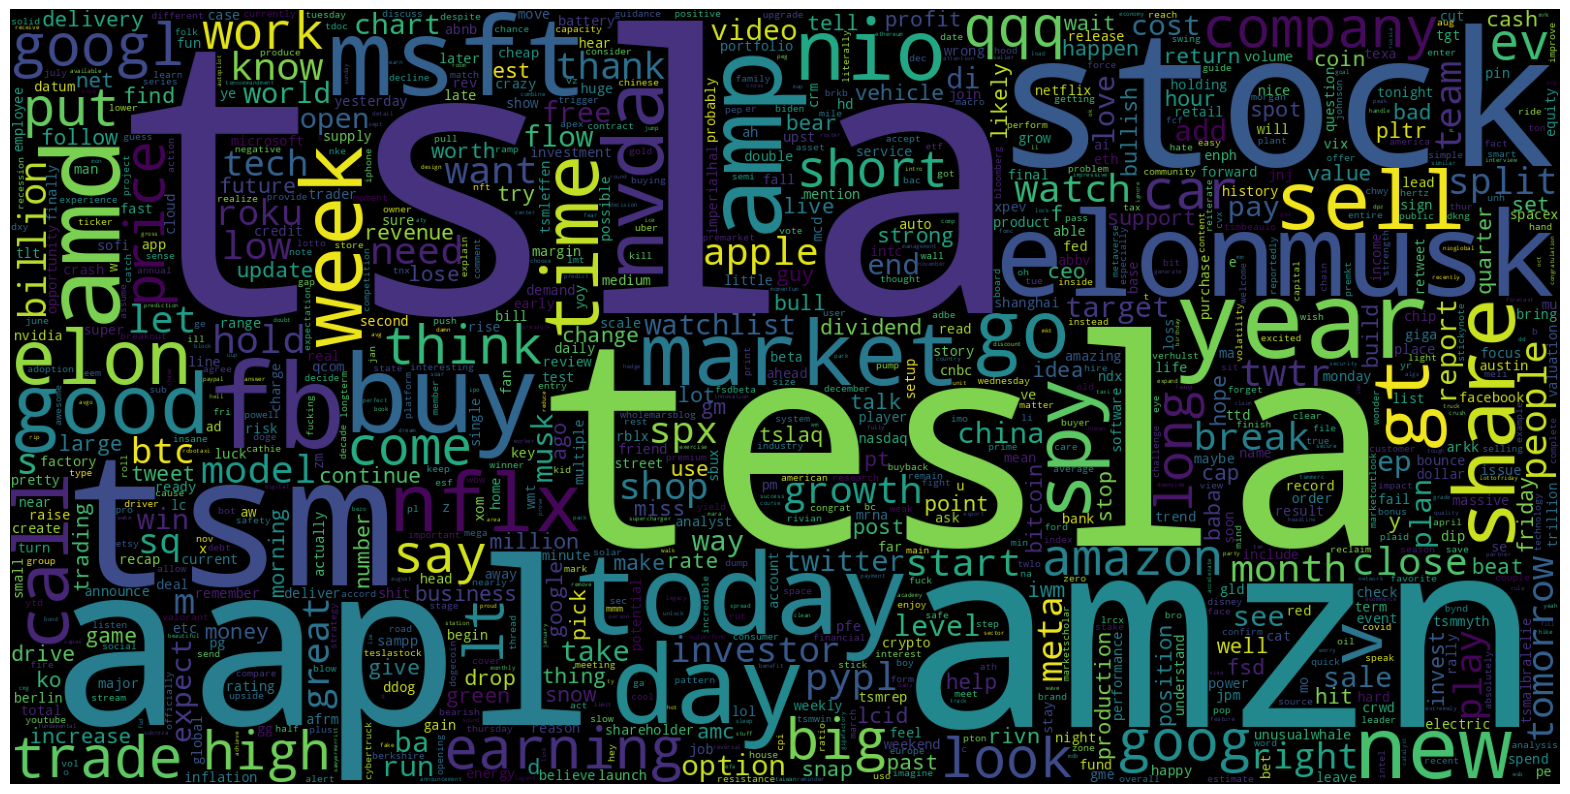

In [ ]:
from wordcloud import WordCloud
data = df1.Tweet
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

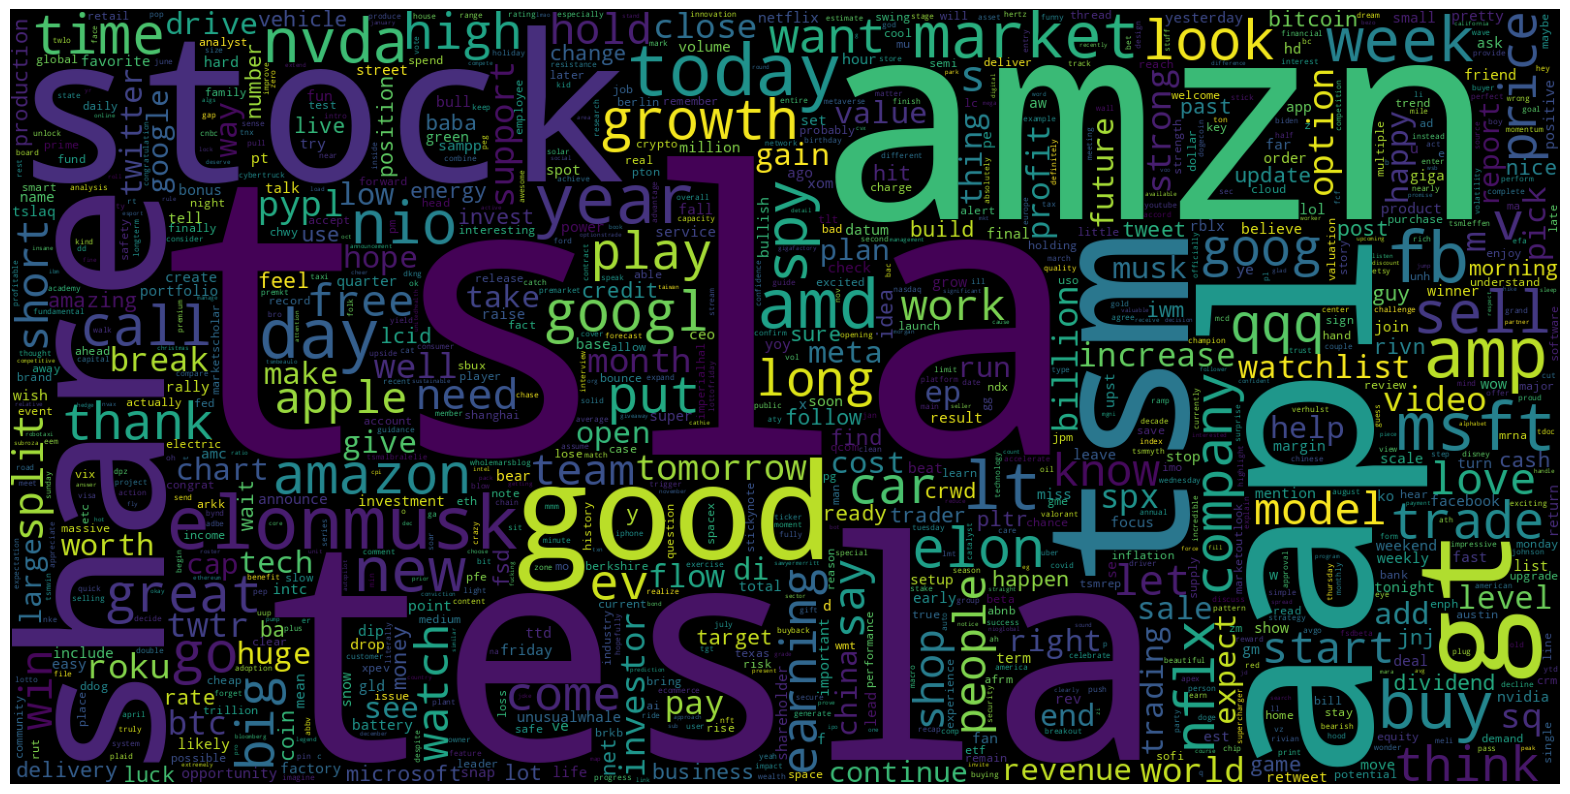

In [ ]:
from wordcloud import WordCloud
data = df1[df1['Sentiment'] == "Positive"]['Tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

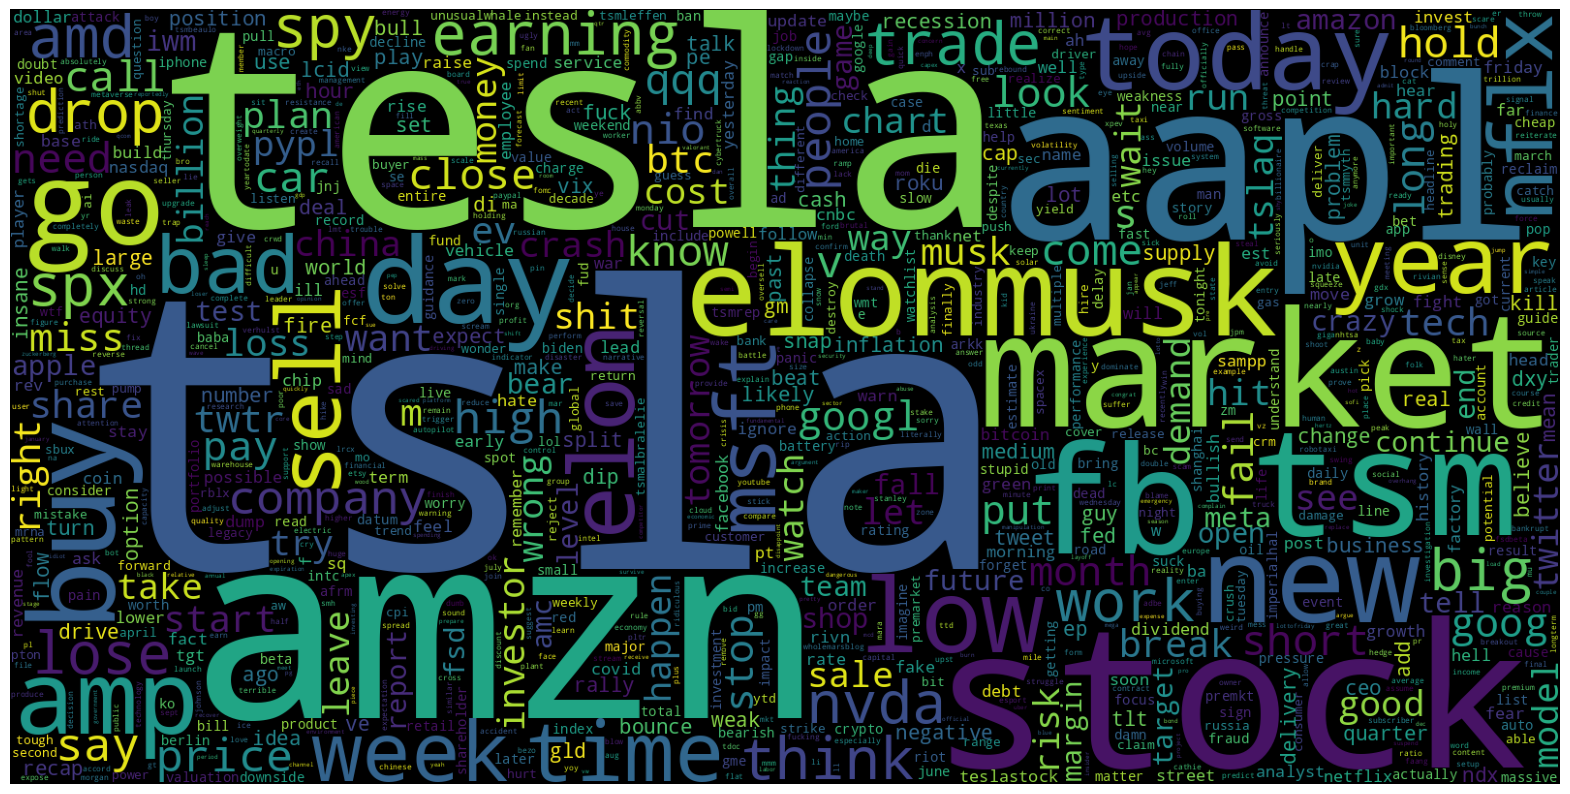

In [ ]:
from wordcloud import WordCloud
data = df1[df1['Sentiment'] == "Negative"]['Tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

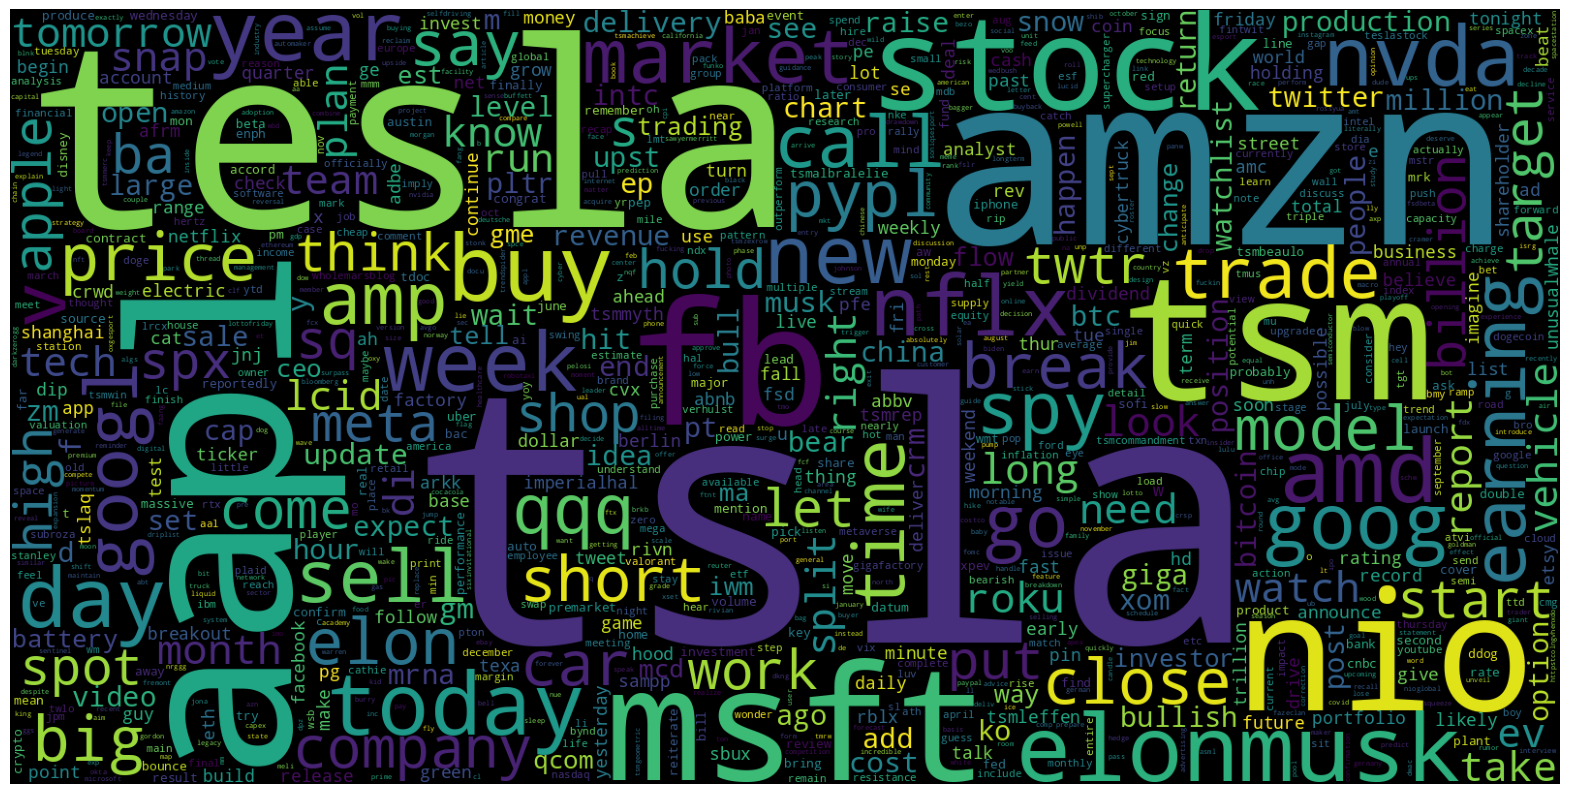

In [ ]:
from wordcloud import WordCloud
data = df1[df1['Sentiment'] == "Neutral"]['Tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
sentiment_counts_stock = df1.groupby(['Stock Name', 'Sentiment']).size().unstack(fill_value=0)

In [ ]:
sentiment_counts_stock

Sentiment   Negative  Neutral  Positive
Stock Name                             
AAPL            1032     1701      2323
AMD              299      586      1342
AMZN             796     1024      2269
BA                54      139       206
BX                 5       12        33
COST              74      139       180
CRM               31       88       114
DIS              107      232       296
ENPH              29       52       135
F                  9        5        17
GOOG             213      411       667
INTC              58       99       158
KO                50      106       154
META             604      810      1337
MSFT             796     1024      2269
NFLX             461      509       757
NIO              311     1187      1523
NOC                9        5        17
PG               796     1024      2269
PYPL             145      260       438
TSLA            7696    11025     18701
TSM             1988     3470      5576
VZ                25       34        64
XPEV              24       57       144
ZS                20       61       112

In [ ]:
sentiment_counts_company = df1.groupby(['Company Name', 'Sentiment']).size().unstack(fill_value=0)

In [ ]:
sentiment_counts_company

Sentiment                                           Negative  Neutral  \
Company Name                                                            
Advanced Micro Devices, Inc.                             299      586   
Alphabet Inc.                                            213      411   
Amazon.com, Inc.                                         796     1024   
Apple Inc.                                              1032     1701   
Blackstone Inc.                                            5       12   
Costco Wholesale Corporation                              74      139   
Enphase Energy, Inc.                                      29       52   
Ford Motor Company                                         9        5   
Intel Corporation                                         58       99   
Meta Platforms, Inc.                                     604      810   
Microsoft Corporation                                    796     1024   
NIO Inc.                                                 311     1187   
Netflix, Inc.                                            461      509   
Northrop Grumman Corporation                               9        5   
PayPal Holdings, Inc.                                    145      260   
Procter & Gamble Company                                 796     1024   
Salesforce, Inc.                                          31       88   
Taiwan Semiconductor Manufacturing Company Limited      1988     3470   
Tesla, Inc.                                             7696    11025   
The Boeing Company                                        54      139   
The Coca-Cola Company                                     50      106   
The Walt Disney Company                                  107      232   
Verizon Communications Inc.                               25       34   
XPeng Inc.                                                24       57   
Zscaler, Inc.                                             20       61   

Sentiment                                           Positive  
Company Name                                                  
Advanced Micro Devices, Inc.                            1342  
Alphabet Inc.                                            667  
Amazon.com, Inc.                                        2269  
Apple Inc.                                              2323  
Blackstone Inc.                                           33  
Costco Wholesale Corporation                             180  
Enphase Energy, Inc.                                     135  
Ford Motor Company                                        17  
Intel Corporation                                        158  
Meta Platforms, Inc.                                    1337  
Microsoft Corporation                                   2269  
NIO Inc.                                                1523  
Netflix, Inc.                                            757  
Northrop Grumman Corporation                              17  
PayPal Holdings, Inc.                                    438  
Procter & Gamble Company                                2269  
Salesforce, Inc.                                         114  
Taiwan Semiconductor Manufacturing Company Limited      5576  
Tesla, Inc.                                            18701  
The Boeing Company                                       206  
The Coca-Cola Company                                    154  
The Walt Disney Company                                  296  
Verizon Communications Inc.                               64  
XPeng Inc.                                               144  
Zscaler, Inc.                                            112

In [ ]:
sentiment_counts_company['Total_Positive'] = sentiment_counts_company['Positive']
sentiment_counts_company['Total_Negative'] = sentiment_counts_company['Negative']
sentiment_counts_company['Total_Neutral'] = sentiment_counts_company['Neutral']

In [ ]:
company_highest_positive = sentiment_counts_company['Total_Positive'].idxmax()
highest_positive_count = sentiment_counts_company['Total_Positive'].max()

company_highest_negative = sentiment_counts_company['Total_Negative'].idxmax()
highest_negative_count = sentiment_counts_company['Total_Negative'].max()

company_highest_neutral = sentiment_counts_company['Total_Neutral'].idxmax()
highest_neutral_count = sentiment_counts_company['Total_Neutral'].max()

company_lowest_positive = sentiment_counts_company['Total_Positive'].idxmin()
lowest_positive_count = sentiment_counts_company['Total_Positive'].min()

company_lowest_negative = sentiment_counts_company['Total_Negative'].idxmin()
lowest_negative_count = sentiment_counts_company['Total_Negative'].min()

company_lowest_neutral = sentiment_counts_company['Total_Neutral'].idxmin()
lowest_neutral_count = sentiment_counts_company['Total_Neutral'].min()

print(f"Company with Highest Positive Sentiment Count: {company_highest_positive} ({highest_positive_count} positive sentiments)")
print(f"Company with Highest Negative Sentiment Count: {company_highest_negative} ({highest_negative_count} negative sentiments)")
print(f"Company with Highest Neutral Sentiment Count: {company_highest_neutral} ({highest_neutral_count} neutral sentiments)")

print(f"Company with Lowest Positive Sentiment Count: {company_lowest_positive} ({lowest_positive_count} positive sentiments)")
print(f"Company with Lowest Negative Sentiment Count: {company_lowest_negative} ({lowest_negative_count} negative sentiments)")
print(f"Company with Lowest Neutral Sentiment Count: {company_lowest_neutral} ({lowest_neutral_count} neutral sentiments)")

Company with Highest Positive Sentiment Count: Tesla, Inc. (18701 positive sentiments)
Company with Highest Negative Sentiment Count: Tesla, Inc. (7696 negative sentiments)
Company with Highest Neutral Sentiment Count: Tesla, Inc. (11025 neutral sentiments)
Company with Lowest Positive Sentiment Count: Ford Motor Company (17 positive sentiments)
Company with Lowest Negative Sentiment Count: Blackstone Inc. (5 negative sentiments)
Company with Lowest Neutral Sentiment Count: Ford Motor Company (5 neutral sentiments)


In [ ]:
positive_data = df1[df1['Sentiment'] == "Positive"]

grouped_data = positive_data.groupby('Stock Name')

num_plots = min(len(grouped_data), 25)
rows, cols = (num_plots // 5) + 1, min(num_plots, 5)

plt.figure(figsize=(20, 20))
for i, (stock_name, data) in enumerate(grouped_data):
    wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data['Tweet']))
    plt.subplot(rows, cols, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(stock_name)
    plt.axis('off')

plt.show()

In [ ]:
negative_data = df1[df1['Sentiment'] == "Negative"]

grouped_data = negative_data.groupby('Stock Name')

num_plots = min(len(grouped_data), 25)
rows, cols = (num_plots // 5) + 1, min(num_plots, 5)

plt.figure(figsize=(20, 20))
for i, (stock_name, data) in enumerate(grouped_data):
    wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data['Tweet']))
    plt.subplot(rows, cols, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(stock_name)
    plt.axis('off')

plt.show()

In [ ]:
neutral_data = df1[df1['Sentiment'] == "Neutral"]

grouped_data = neutral_data.groupby('Stock Name')

num_plots = min(len(grouped_data), 25)
rows, cols = (num_plots // 5) + 1, min(num_plots, 5)

plt.figure(figsize=(20, 20))
for i, (stock_name, data) in enumerate(grouped_data):
    wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data['Tweet']))
    plt.subplot(rows, cols, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(stock_name)
    plt.axis('off')

plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf1=TfidfVectorizer()
data_vec=tf1.fit_transform(df1['Tweet'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['Sentiment_Label'] = label_encoder.fit_transform(df1['Sentiment'])

In [ ]:
y=df1['Sentiment_Label'].values

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.2,stratify = y, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
models = [dt, rf]

accuracies = []

for model in models:
    print('Results for the model:', model.__class__.__name__)
    model.fit(X_balanced, y_balanced)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    report = classification_report(y_test, y_pred)
    print('Classification Report:\n', report)

    print('\n')

    accuracies.append(accuracy)

print('List of Accuracies:', accuracies)

Results for the model: DecisionTreeClassifier
Accuracy: 0.8726406337025806
Confusion Matrix:
 [[2392  227  508]
 [ 158 4492  162]
 [ 606  397 7217]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      3127
           1       0.88      0.93      0.90      4812
           2       0.92      0.88      0.90      8220

    accuracy                           0.87     16159
   macro avg       0.85      0.86      0.85     16159
weighted avg       0.87      0.87      0.87     16159



Results for the model: RandomForestClassifier
Accuracy: 0.8951048951048951
Confusion Matrix:
 [[2434  279  414]
 [  82 4595  135]
 [ 332  453 7435]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      3127
           1       0.86      0.95      0.91      4812
           2       0.93      0.90      0.92      8220

    accuracy                           0.90     16159

In [ ]:
model_names = ['DecisionTree', 'RandomForest']
fig = go.Figure(data=go.Bar(x=model_names, y=accuracies))
fig.update_layout(title='Model Accuracies',
                  xaxis_title='Model',
                  yaxis_title='Accuracy',
                  yaxis_tickformat='.2%',
                  yaxis_range=[0, 1],
                  xaxis_tickangle=0)
fig.show()